In [598]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

In [599]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
usa = world[world['ADMIN'] == 'United States of America']

In [608]:
pt = Point(-95, 33)
gdf_pt = gpd.GeoSeries([pt], crs="EPSG:4326").to_frame(name="geometry")

In [601]:
hail_gdf = gpd.read_file('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024/12/forecast_day1/day1otlk_20241231_2000/day1otlk_20241231_2000_hail.shp')
hail_gdf

,DN,VALID,EXPIRE,ISSUE,LABEL,LABEL2,stroke,fill,geometry
0,5,202412312000,202501011200,202412311938,0.05,5% Hail Risk,#70380f,#9d4e15,POLYGON ((-75.64...


In [602]:
hail_gdf = gpd.read_file('/Users/jimnguyen/IRMII/SCS_API/convective_outlooks/2024/1/forecast_day1/day1otlk_20240111_1200/day1otlk_20240111_1200_hail.shp')
hail_gdf

,DN,VALID,EXPIRE,ISSUE,LABEL,LABEL2,stroke,fill,geometry
0,5,202401111200,202401121200,202401110558,0.05,5% Hail Risk,#70380f,#9d4e15,POLYGON ((-95.05...
1,15,202401111200,202401121200,202401110558,0.15,15% Hail Risk,#DDAA00,#FFE066,POLYGON ((-96.31...
2,10,202401111200,202401121200,202401110558,SIGN,10% Significant ...,#000000,#888888,POLYGON ((-94.84...


In [603]:
hail_gdf['LABEL'].dtype

dtype('O')

In [604]:
hail_gdf.to_csv("testinghail.csv")

/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_30625/2044487639.py:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(handles=handles + ax.get_legend_handles_labels()[0], fontsize="small",


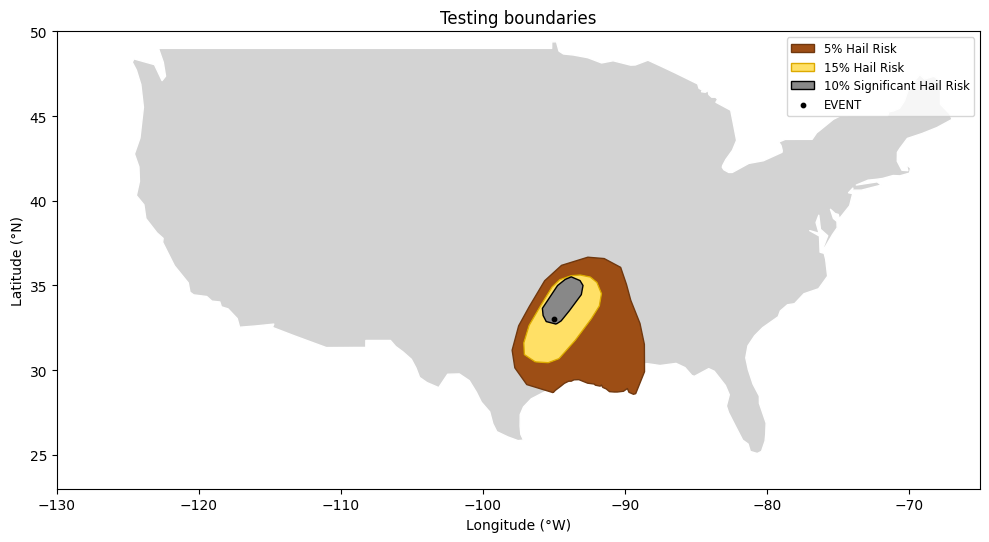

In [609]:
fig, ax = plt.subplots(figsize=(10, 6))

usa.plot(ax=ax, color="lightgray", edgecolor="white", label="USA")

hail_gdf.plot(
    ax=ax,
    facecolor=hail_gdf["fill"],    
    edgecolor=hail_gdf["stroke"], 
    linewidth=1,
    label=None        
)

gdf_pt.plot(
    ax=ax,
    marker="o",
    color="black",
    markersize=10,
    label="EVENT"
)

ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)
ax.set_xlabel("Longitude (°W)")
ax.set_ylabel("Latitude (°N)")
ax.set_title("Testing boundaries")

import matplotlib.patches as mpatches
handles = [
    mpatches.Patch(facecolor=fc, edgecolor=ec, label=lbl)
    for lbl, fc, ec in zip(
        hail_gdf["LABEL2"], hail_gdf["fill"], hail_gdf["stroke"]
    )
]
ax.legend(handles=handles + ax.get_legend_handles_labels()[0], fontsize="small",
          loc="upper right")

plt.tight_layout()
plt.show()


In [610]:
result = hail_gdf['geometry'].contains(pt)
result

0    False
1     True
2     True
dtype: bool

**Note: Not sure why 0 is False, it is clearly in the 5% hail risk but we'll somehow figure it out**

In [186]:
storm_24 = pd.read_csv("/Users/jimnguyen/IRMII/SCS_API/data/Storm_Reports/Storm_Reports_2024.csv")

In [187]:
storm_24 = storm_24[]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202405,23,1947,202405,23,1947,190907,1180619,OKLAHOMA,40,...,4.0,S,FRIENDSHIP,34.6380,-99.2167,34.6380,-99.2167,Two primary rounds of severe convection occurr...,MPing report.,CSV
1,202411,16,230,202411,18,1421,197838,1223377,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...,CSV
2,202405,19,1839,202405,19,1902,190905,1184919,OKLAHOMA,40,...,5.0,N,CUSTER CITY,35.7100,-99.0010,35.7370,-98.8910,Significant severe weather occurred across por...,While the large multiple-vortex tornado was ap...,CSV
3,202405,23,2155,202405,23,2155,190907,1180805,OKLAHOMA,40,...,2.0,W,NINNEKAH,34.9501,-97.9523,34.9501,-97.9523,Two primary rounds of severe convection occurr...,Relayed image showing a portable outbuilding b...,CSV
4,202405,24,1405,202405,24,1410,191916,1182348,MISSISSIPPI,28,...,0.0,N,ALGOMA,34.1800,-89.0300,34.1800,-89.0300,An active storm pattern as several mid-level s...,Reports of trees down in Algoma.,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70191,202407,4,1500,202407,4,1600,195150,1206283,ALABAMA,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heat index values reached 105 to 109 degrees f...,The heat index peaked at 110 degrees for a sho...,CSV
70192,202407,4,1100,202407,4,1800,195150,1206284,ALABAMA,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heat index values reached 105 to 109 degrees f...,The heat index reached 105 to 109 degrees.,CSV
70193,202407,6,1258,202407,6,1258,192857,1198392,NEBRASKA,31,...,8.0,SW,LEXINGTON ARPT,40.7100,-99.8800,40.7100,-99.8800,"A broad, upper trough was over most of the cou...",NaN,CSV
70194,202407,6,1523,202407,6,1535,192857,1198427,NEBRASKA,31,...,1.0,SE,HASTINGS,40.6000,-98.4300,40.5700,-98.3696,"A broad, upper trough was over most of the cou...",A wind gust of 69 MPH was measured by the Hast...,CSV


In [532]:
all_reports = pd.read_csv('/Users/jimnguyen/IRMII/SCS_API/data/All_SCS_Reports.csv',low_memory = False)

In [537]:
pd.set_option('display.max_colwidth', 20)

In [533]:
all_reports['BEGIN'] = (
    all_reports['BEGIN_YEARMONTH'].astype(str)
    + all_reports['BEGIN_DAY'].astype(str).str.zfill(2)
    + all_reports['BEGIN_TIME'].astype(str).str.zfill(4)
).astype(int)

In [534]:
all_reports['END'] = (
    all_reports['END_YEARMONTH'].astype(str)
    + all_reports['END_DAY'].astype(str).str.zfill(2)   
    + all_reports['END_TIME'].astype(str).str.zfill(4) 
).astype(int)

In [318]:
all_reports['CHECK'] = all_reports['BEGIN'] - all_reports['END']
all_reports['CHECK'].unique()

array([     0, -60000,     -1, ..., -19310,  -1172,  -1358], shape=(3987,))

In [538]:
all_reports

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,BEGIN,END
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.1200,-99.2000,35.1700,-99.2000,NaN,NaN,PUB,195004281445,195004281445
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.9000,-98.6000,31.7300,-98.6000,NaN,NaN,PUB,195004291530,195004291530
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.5800,-75.7000,40.6500,-75.4700,NaN,NaN,PUB,195007051800,195007051800
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.6000,-76.7500,NaN,NaN,NaN,NaN,PUB,195007051830,195007051830
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.6300,-79.6800,NaN,NaN,NaN,NaN,PUB,195007241440,195007241440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168951,202407,29,1615,202407,29,1615,195351.0,1207436,MARYLAND,24.0,2024,July,Thunderstorm Wind,C,31,MONTGOMERY,LWX,29-JUL-24 16:15:00,EST-5,29-JUL-24 16:15:00,0,0,0,0,3.00K,NaN,Social Media,52.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,SENECA,1.0,WSW,SENECA,39.0783,-77.3402,39.0783,-77.3402,A couple of thun...,Several trees an...,CSV,202407291615,202407291615
1168952,202407,29,1824,202407,29,1824,195351.0,1207437,MARYLAND,24.0,2024,July,Thunderstorm Wind,C,3,ANNE ARUNDEL,LWX,29-JUL-24 18:24:00,EST-5,29-JUL-24 18:24:00,0,0,0,0,2.00K,NaN,911 Call Center,52.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,SSE,GLEN BURNIE,0.0,SSE,GLEN BURNIE,39.1694,-76.6295,39.1694,-76.6295,A couple of thun...,Trees and power ...,CSV,202407291824,202407291824
1168953,202407,6,1258,202407,6,1258,192857.0,1198392,NEBRASKA,31.0,2024,July,Hail,C,47,DAWSON,GID,06-JUL-24 12:58:00,CST-6,06-JUL-24 12:58:00,0,0,0,0,0.00K,0.00K,Public,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,SW,LEXINGTON ARPT,8.0,SW,LEXINGTON ARPT,40.7100,-99.8800,40.7100,-99.8800,"A broad, upper t...",NaN,CSV,202407061258,202407061258
1168954,202407,6,1523,202407,6,1535,192857.0,1198427,NEBRASKA,31.0,2024,July,Thunderstorm Wind,C,1,ADAMS,GID,06-JUL-24 15:23:00,CST-6,06-JUL-24 15:35:00,0,0,0,0,15.00K,0.00K,ASOS,60.0,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,(HSI)HASTINGS ARPT,1.0,SE,HASTINGS,40.6000,-98.4300,40.5700,-98.3696,"A broad, upper t...",A wind gust of 6...,CSV,202407061523,202407061535


In [539]:
reports = all_reports[['BEGIN','END','EVENT_TYPE','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON','MAGNITUDE']]

In [540]:
reports

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
0,195004281445,195004281445,Tornado,35.1200,-99.2000,35.1700,-99.2000,0.0
1,195004291530,195004291530,Tornado,31.9000,-98.6000,31.7300,-98.6000,0.0
2,195007051800,195007051800,Tornado,40.5800,-75.7000,40.6500,-75.4700,0.0
3,195007051830,195007051830,Tornado,40.6000,-76.7500,NaN,NaN,0.0
4,195007241440,195007241440,Tornado,41.6300,-79.6800,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
1168951,202407291615,202407291615,Thunderstorm Wind,39.0783,-77.3402,39.0783,-77.3402,52.0
1168952,202407291824,202407291824,Thunderstorm Wind,39.1694,-76.6295,39.1694,-76.6295,52.0
1168953,202407061258,202407061258,Hail,40.7100,-99.8800,40.7100,-99.8800,1.0
1168954,202407061523,202407061535,Thunderstorm Wind,40.6000,-98.4300,40.5700,-98.3696,60.0


In [542]:
hail_reports = reports[reports['EVENT_TYPE']== 'Hail']
hail_reports

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [543]:
hail_reports.to_csv('hail_only.csv')

# For all hail events, no filtering whatsever just raw

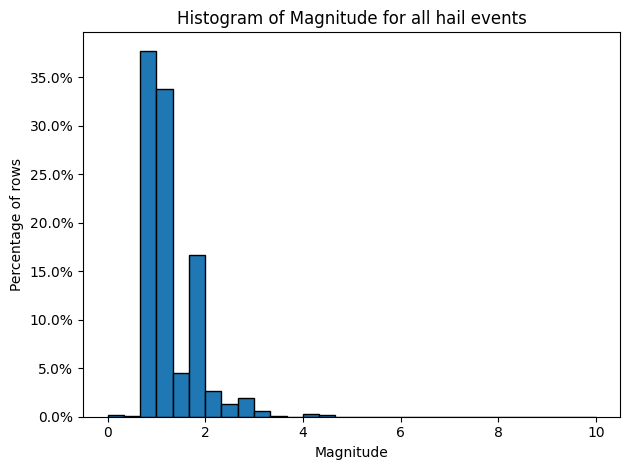

In [439]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

magnitudes = hail_reports['MAGNITUDE']

weights = np.ones_like(magnitudes) / len(magnitudes)

plt.hist(
    magnitudes,
    bins=30,
    weights=weights,          
    edgecolor='black'
)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

plt.xlabel('Magnitude')
plt.ylabel('Percentage of rows')
plt.title('Histogram of Magnitude for all hail events')
plt.tight_layout()
plt.show()


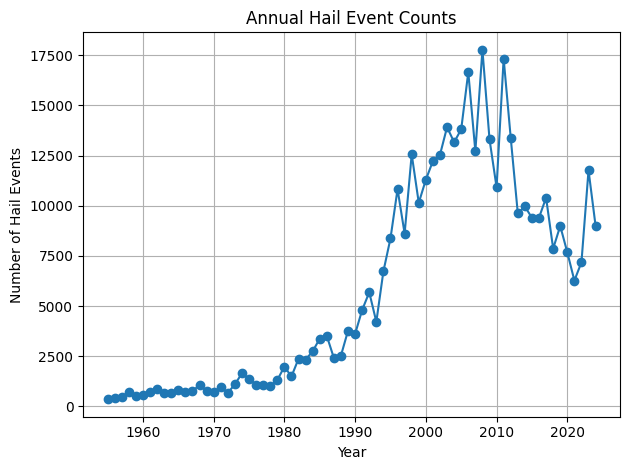

In [483]:
import pandas as pd
import matplotlib.pyplot as plt

df = hail_reports.copy()  

df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

yearly_counts = df.groupby(df['BEGIN'].dt.year).size()

plt.figure()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Hail Events')
plt.title('Annual Hail Event Counts')
plt.grid(True)
plt.tight_layout()
plt.show()


# Histogram for any row that has an NaN value (not using)

In [440]:
mask = hail_reports.isna().any(axis=1)
hail_with_any_na = hail_reports[mask]
hail_with_any_na


,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
558123,200607271730,200607271735,Hail,NaN,NaN,NaN,NaN,0.88
1054697,202110081300,202110081300,Hail,NaN,NaN,NaN,NaN,1.00
1054698,202110081547,202110081547,Hail,NaN,NaN,NaN,NaN,1.00
1054766,202110082052,202110082052,Hail,NaN,NaN,NaN,NaN,1.00


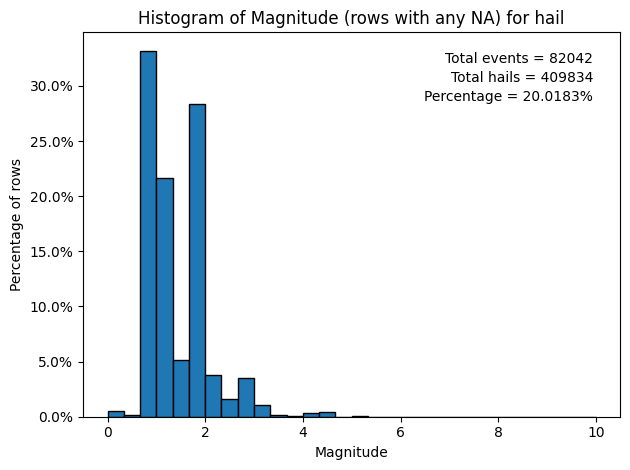

In [479]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

magnitudes = hail_with_any_na['MAGNITUDE']

weights = np.ones_like(magnitudes) / len(magnitudes)
count = len(magnitudes)
plt.hist(
    magnitudes,
    bins=30,
    weights=weights,          
    edgecolor='black'
)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))


ax.text(
    0.95, 0.95,
    f'Total events = {count}',
    ha='right', va='top',
    transform=ax.transAxes
)


ax.text(
    0.95, 0.90,
    f'Total hails = 409834',
    ha='right', va='top',
    transform=ax.transAxes
)

ax.text(
    0.95, 0.85,
    f'Percentage = {round(100*(count/409834),4)}%',
    ha='right', va='top',
    transform=ax.transAxes
)


plt.xlabel('Magnitude')
plt.ylabel('Percentage of rows')
plt.title('Histogram of Magnitude (rows with any NA) for hail')
plt.tight_layout()
plt.show()


# All four coords are missing

## Distribution of hail size

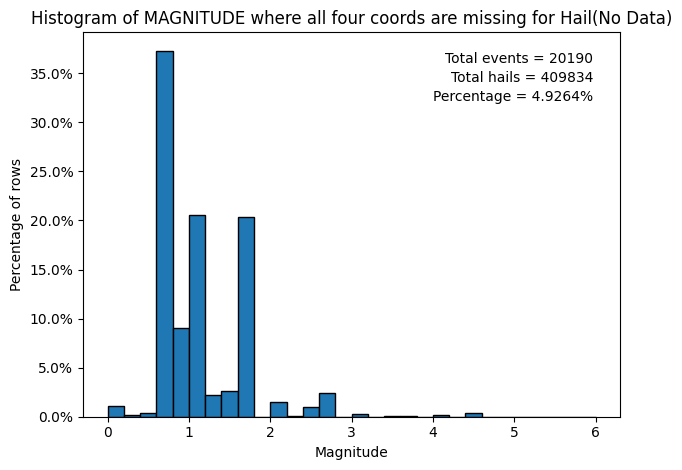

In [472]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

coords = ['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']
mask = hail_reports[coords].isna().all(axis=1)

only_gaps = hail_reports[mask]
count = len(only_gaps)
magnitudes = only_gaps['MAGNITUDE']

weights = np.ones_like(magnitudes) / len(magnitudes)

plt.hist(
    magnitudes,
    bins=30,
    weights=weights,
    edgecolor='black'
)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

ax.text(
    0.95, 0.95,
    f'Total events = {count}',
    ha='right', va='top',
    transform=ax.transAxes
)


ax.text(
    0.95, 0.90,
    f'Total hails = 409834',
    ha='right', va='top',
    transform=ax.transAxes
)

ax.text(
    0.95, 0.85,
    f'Percentage = {round(100*(count/409834),4)}%',
    ha='right', va='top',
    transform=ax.transAxes
)

plt.xlabel('Magnitude')
plt.ylabel('Percentage of rows')
plt.title('Histogram of MAGNITUDE where all four coords are missing for Hail(No Data)')
plt.tight_layout()
plt.show()


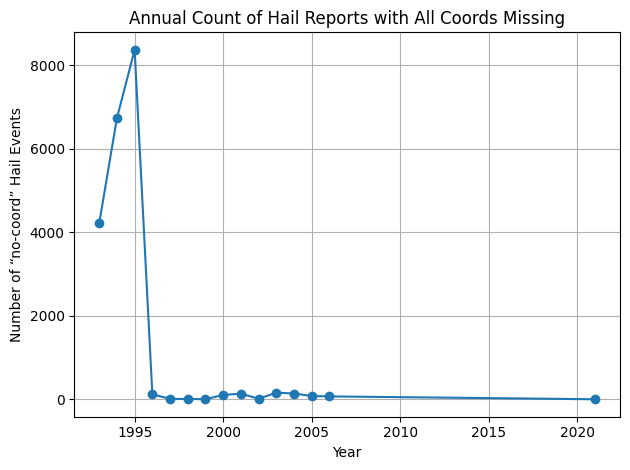

In [485]:
import pandas as pd
import matplotlib.pyplot as plt

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

coords = ['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']
mask = df[coords].isna().all(axis=1)
gaps = df[mask]

yearly_gap_counts = gaps.groupby(gaps['BEGIN'].dt.year).size()

plt.figure()
plt.plot(yearly_gap_counts.index, yearly_gap_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of “no‐coord” Hail Events')
plt.title('Annual Count of Hail Reports with All Coords Missing')
plt.grid(True)
plt.tight_layout()
plt.show()


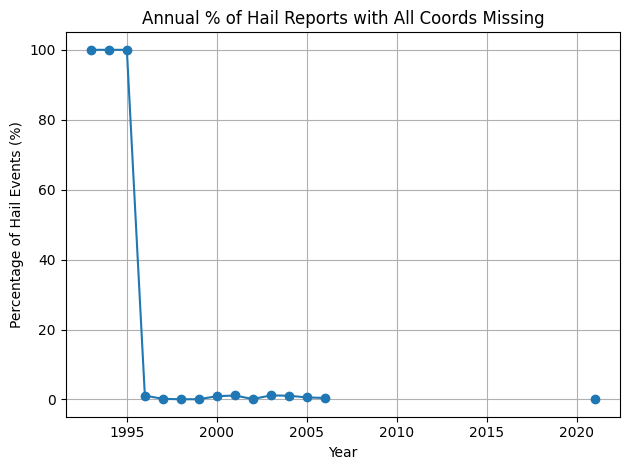

In [487]:
import pandas as pd
import matplotlib.pyplot as plt

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

total_per_year = df.groupby(df['BEGIN'].dt.year).size()

#Find no coords
coords = ['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']
gaps = df[df[coords].isna().all(axis=1)]
gaps_per_year = gaps.groupby(gaps['BEGIN'].dt.year).size()

pct_per_year = (gaps_per_year / total_per_year) * 100
pct_per_year = pct_per_year.reindex(total_per_year.index, fill_value=0)

plt.figure()
plt.plot(pct_per_year.index, pct_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Hail Events (%)')
plt.title('Annual % of Hail Reports with All Coords Missing')
plt.grid(True)
plt.tight_layout()
plt.show()


# End coords missing Begin cords present

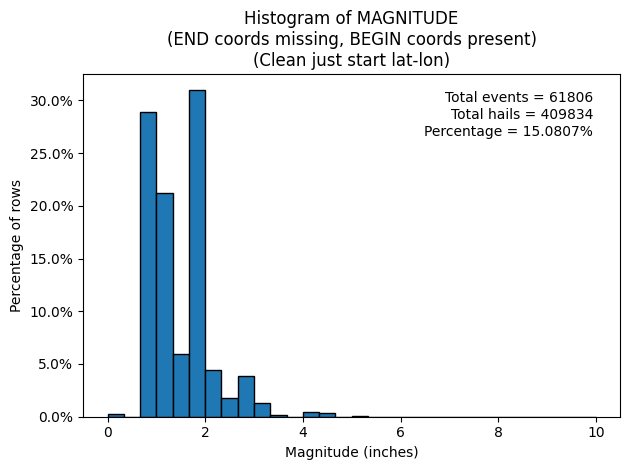

In [478]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

mask = (
    hail_reports[['BEGIN_LAT','BEGIN_LON']].notna().all(axis=1)
    & hail_reports[['END_LAT','END_LON']].isna().all(axis=1)
)

begin_only = hail_outlooks[mask]
count = len(begin_only)

magnitudes = begin_only['MAGNITUDE']

weights = np.ones_like(magnitudes) / len(magnitudes)

plt.hist(
    magnitudes,
    bins=30,
    weights=weights,
    edgecolor='black'
)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

ax.text(
    0.95, 0.95,
    f'Total events = {count}',
    ha='right', va='top',
    transform=ax.transAxes
)


ax.text(
    0.95, 0.90,
    f'Total hails = 409834',
    ha='right', va='top',
    transform=ax.transAxes
)

ax.text(
    0.95, 0.85,
    f'Percentage = {round(100*(count/409834),4)}%',
    ha='right', va='top',
    transform=ax.transAxes
)

plt.xlabel('Magnitude (inches)')
plt.ylabel('Percentage of rows')
plt.title('Histogram of MAGNITUDE\n(END coords missing, BEGIN coords present)\n(Clean just start lat-lon)')
plt.tight_layout()
plt.show()


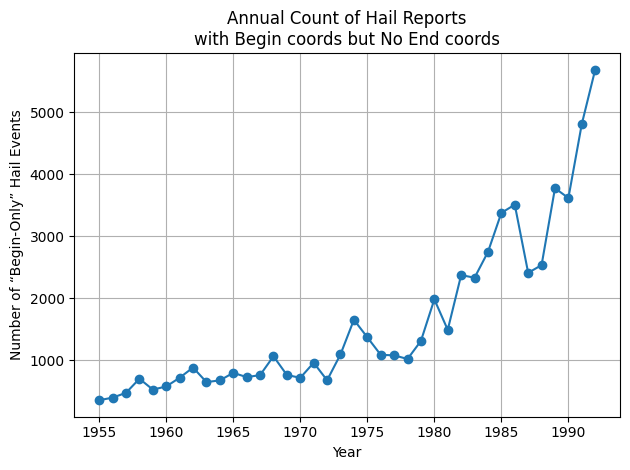

In [519]:
import pandas as pd
import matplotlib.pyplot as plt

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

mask = (
    df[['BEGIN_LAT','BEGIN_LON']].notna().all(axis=1)
    & df[['END_LAT','END_LON']].isna().all(axis=1)
)
begin_only = df[mask]

annual_begin_only = begin_only.groupby(begin_only['BEGIN'].dt.year).size()

plt.figure()
plt.plot(annual_begin_only.index, annual_begin_only.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of “Begin-Only” Hail Events')
plt.title('Annual Count of Hail Reports\nwith Begin coords but No End coords')
plt.grid(True)
plt.tight_layout()
plt.show()


In [525]:
df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')
df

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,1955-09-22 16:10:00,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,1955-07-19 13:30:00,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,1955-10-28 16:45:00,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,1955-06-12 17:00:00,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,1955-05-07 18:45:00,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
1168917,2024-07-06 12:46:00,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,2024-07-06 15:20:00,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,2024-07-06 12:55:00,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,2024-07-06 12:58:00,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [521]:
total_counts = df.groupby(df['BEGIN'].dt.year).size()
total_counts

BEGIN
1955      360
1956      401
1957      479
1958      706
1959      531
        ...  
2020     7677
2021     6272
2022     7180
2023    11767
2024     8992
Length: 70, dtype: int64

In [529]:
mask_begin_only = (
    df[['BEGIN_LAT', 'BEGIN_LON']].notna().all(axis=1) &
    df[['END_LAT', 'END_LON']].isna().all(axis=1)
)
begin_only = df[mask_begin_only]
begin_only

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,1955-09-22 16:10:00,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,1955-07-19 13:30:00,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,1955-10-28 16:45:00,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,1955-06-12 17:00:00,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,1955-05-07 18:45:00,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
187342,1992-06-08 19:28:00,199206081928,Hail,32.97,-102.85,NaN,NaN,1.00
187343,1992-06-08 19:40:00,199206081940,Hail,35.93,-100.92,NaN,NaN,0.75
187370,1992-06-11 17:40:00,199206111740,Hail,33.85,-102.32,NaN,NaN,1.75
187371,1992-06-11 17:40:00,199206111740,Hail,35.13,-101.90,NaN,NaN,0.88


In [523]:
begin_only_counts = begin_only.groupby(begin_only['BEGIN'].dt.year).size()
begin_only_counts

BEGIN
1955     360
1956     401
1957     479
1958     706
1959     531
1960     581
1961     722
1962     886
1963     652
1964     679
1965     801
1966     732
1967     764
1968    1068
1969     766
1970     721
1971     964
1972     681
1973    1098
1974    1656
1975    1374
1976    1091
1977    1083
1978    1024
1979    1315
1980    1985
1981    1494
1982    2376
1983    2334
1984    2749
1985    3379
1986    3511
1987    2413
1988    2537
1989    3777
1990    3618
1991    4811
1992    5687
dtype: int64

In [530]:
pct_per_year = (begin_only_counts / total_counts) * 100
pct_per_year = pct_per_year.reindex(total_counts.index, fill_value=0)
pct_per_year = pct_per_year.fillna(0)


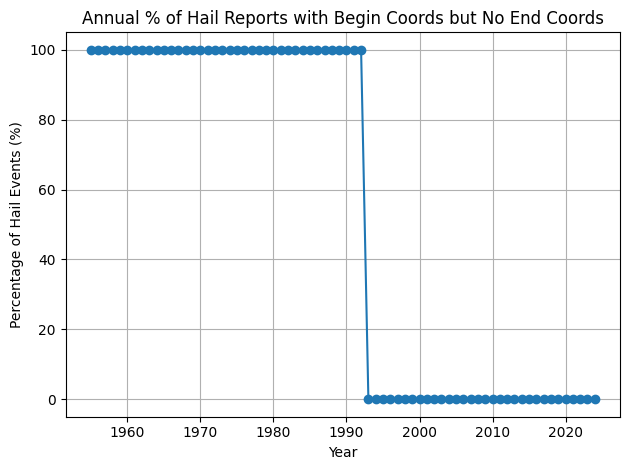

In [531]:
plt.figure()
plt.plot(pct_per_year.index, pct_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Hail Events (%)')
plt.title('Annual % of Hail Reports with Begin Coords but No End Coords')
plt.grid(True)
plt.tight_layout()
plt.show()


Basically this is great, this means that from 1993 and onwards, there isn't any that only has beginning, 

# Both are present

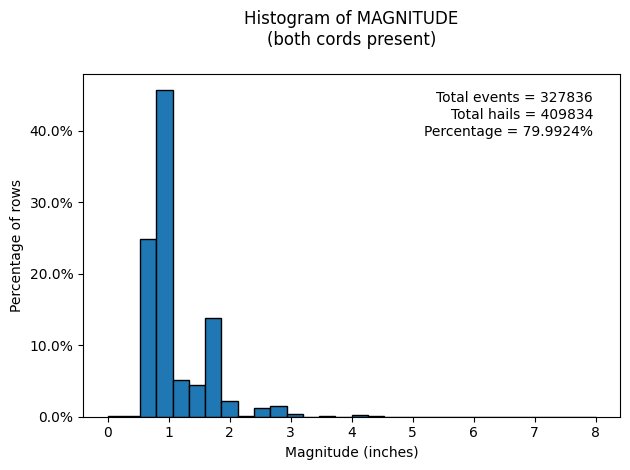

In [545]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

mask = (
    hail_reports[['BEGIN_LAT','BEGIN_LON']].notna().all(axis=1)
    & hail_reports[['END_LAT','END_LON']].notna().all(axis=1)
)

both = hail_reports[mask]
count = len(both)

magnitudes = both['MAGNITUDE']

weights = np.ones_like(magnitudes) / len(magnitudes)

plt.hist(
    magnitudes,
    bins=30,
    weights=weights,
    edgecolor='black'
)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

ax.text(
    0.95, 0.95,
    f'Total events = {count}',
    ha='right', va='top',
    transform=ax.transAxes
)


ax.text(
    0.95, 0.90,
    f'Total hails = 409834',
    ha='right', va='top',
    transform=ax.transAxes
)

ax.text(
    0.95, 0.85,
    f'Percentage = {round(100*(count/409834),4)}%',
    ha='right', va='top',
    transform=ax.transAxes
)
plt.xlabel('Magnitude (inches)')
plt.ylabel('Percentage of rows')
plt.title('Histogram of MAGNITUDE\n(both cords present)\n')
plt.tight_layout()
plt.show()


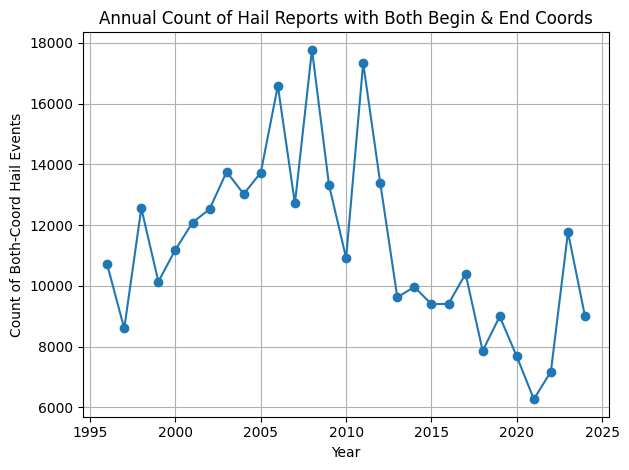

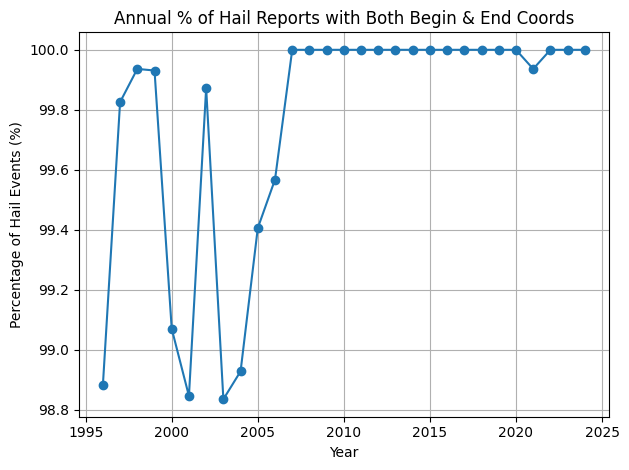

In [584]:
import pandas as pd
import matplotlib.pyplot as plt

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

#total hail
total_per_year = df.groupby(df['BEGIN'].dt.year).size()

mask_both = (
    df[['BEGIN_LAT','BEGIN_LON']].notna().all(axis=1) &
    df[['END_LAT','END_LON']].notna().all(axis=1)
)
both_df = df[mask_both]

#count for both present
both_counts = both_df.groupby(both_df['BEGIN'].dt.year).size()

#pct
pct_both = (both_counts / total_per_year) * 100
pct_both = pct_both.reindex(total_per_year.index, fill_value=0)

#count plot
plt.figure()
plt.plot(both_counts.index, both_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Count of Both-Coord Hail Events')
plt.title('Annual Count of Hail Reports with Both Begin & End Coords')
plt.grid(True)
plt.tight_layout()
plt.show()

#pct
plt.figure()
plt.plot(pct_both.index, pct_both.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Hail Events (%)')
plt.title('Annual % of Hail Reports with Both Begin & End Coords')
plt.grid(True)
plt.tight_layout()
plt.show()


Note that the y axis. Its from 98.8. basically from 1995 onwards it basically includes both

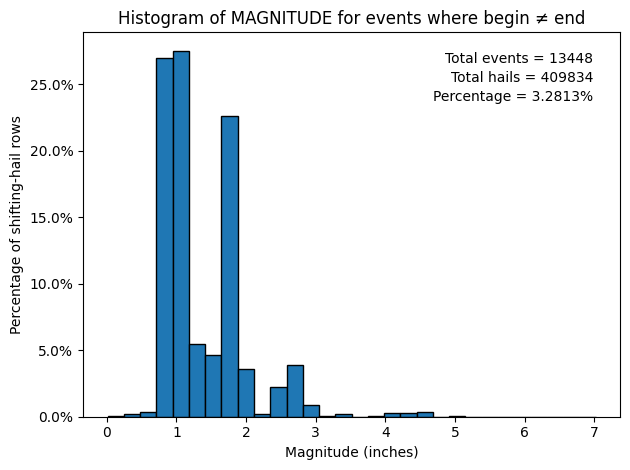

In [544]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

coord_cols = ['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']
valid_coords = hail_outlooks[coord_cols].notna().all(axis=1)
moved = (
    (hail_outlooks['BEGIN_LAT'] != hail_outlooks['END_LAT']) |
    (hail_outlooks['BEGIN_LON'] != hail_outlooks['END_LON'])
)
mask = valid_coords & moved
shifting_hail = hail_outlooks[mask]
magnitudes = shifting_hail['MAGNITUDE']

count = len(shifting_hail)

weights = np.ones_like(magnitudes) / count

fig, ax = plt.subplots()
ax.hist(
    magnitudes,
    bins=30,
    weights=weights,
    edgecolor='black'
)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

ax.text(
    0.95, 0.95,
    f'Total events = {count}',
    ha='right', va='top',
    transform=ax.transAxes
)

ax.text(
    0.95, 0.90,
    f'Total hails = {len(hail_outlooks)}',
    ha='right', va='top',
    transform=ax.transAxes
)

ax.text(
    0.95, 0.85,
    f'Percentage = {round(100*(count/len(hail_outlooks)),4)}%',
    ha='right', va='top',
    transform=ax.transAxes
)


ax.set_xlabel('Magnitude (inches)')
ax.set_ylabel('Percentage of shifting‐hail rows')
ax.set_title('Histogram of MAGNITUDE for events where begin ≠ end')
plt.tight_layout()
plt.show()


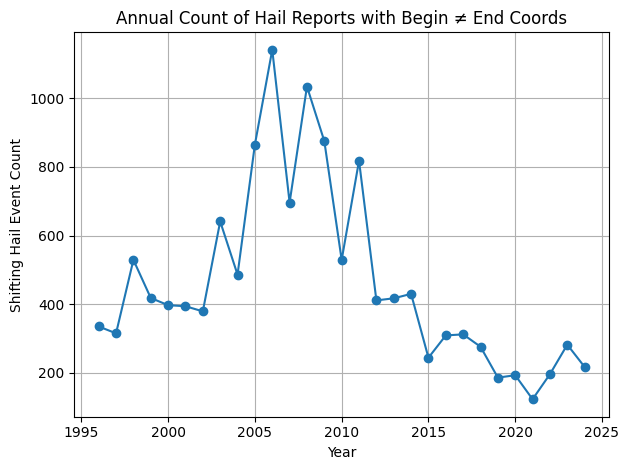

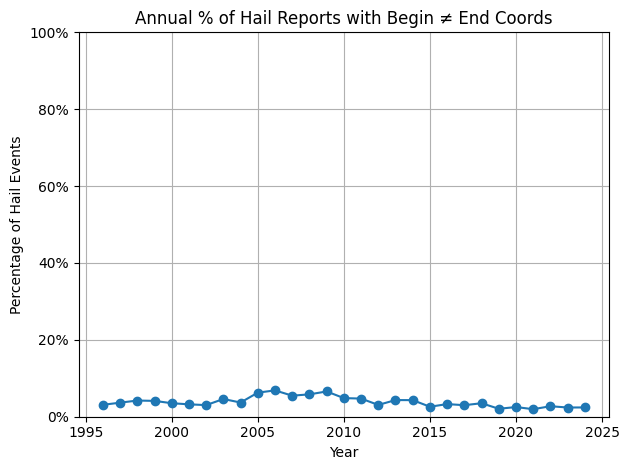

In [585]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df = hail_outlooks.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

total_per_year = df.groupby(df['BEGIN'].dt.year).size()

mask_shifting = (
    df[['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']].notna().all(axis=1)
    & (
        (df['BEGIN_LAT'] != df['END_LAT'])
        | (df['BEGIN_LON'] != df['END_LON'])
      )
)
shifting_df = df[mask_shifting]

shifting_counts = shifting_df.groupby(shifting_df['BEGIN'].dt.year).size()

pct_shifting = (shifting_counts / total_per_year) * 100
pct_shifting = pct_shifting.reindex(total_per_year.index, fill_value=0)

plt.figure()
plt.plot(shifting_counts.index, shifting_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Shifting Hail Event Count')
plt.title('Annual Count of Hail Reports with Begin ≠ End Coords')
plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.plot(pct_shifting.index, pct_shifting.values, marker='o')
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Hail Events')
ax.set_title('Annual % of Hail Reports with Begin ≠ End Coords')
ax.grid(True)
plt.tight_layout()
plt.show()


# Displacement

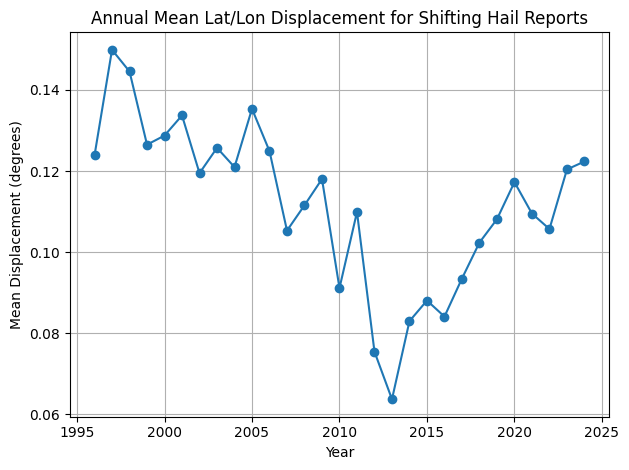

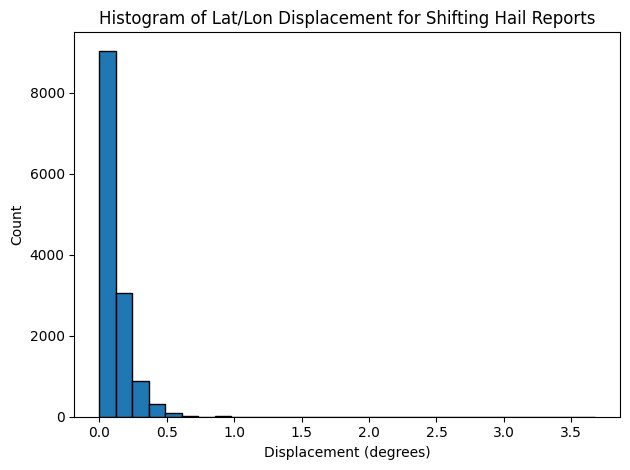

In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

mask_shifting = (
    df[['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']].notna().all(axis=1)
    & (
        (df['BEGIN_LAT'] != df['END_LAT']) |
        (df['BEGIN_LON'] != df['END_LON'])
      )
)
shifting = df[mask_shifting].copy()

shifting['lat_diff'] = (shifting['END_LAT'] - shifting['BEGIN_LAT']).abs()
shifting['lon_diff'] = (shifting['END_LON'] - shifting['BEGIN_LON']).abs()

shifting['deg_displacement'] = np.sqrt(
    shifting['lat_diff']**2 + shifting['lon_diff']**2
)

annual_disp = shifting.groupby(shifting['BEGIN'].dt.year)['deg_displacement'].mean()

plt.figure()
plt.plot(annual_disp.index, annual_disp.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Displacement (degrees)')
plt.title('Annual Mean Lat/Lon Displacement for Shifting Hail Reports')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(shifting['deg_displacement'], bins=30, edgecolor='black')
plt.xlabel('Displacement (degrees)')
plt.ylabel('Count')
plt.title('Histogram of Lat/Lon Displacement for Shifting Hail Reports')
plt.tight_layout()
plt.show()


## By Month

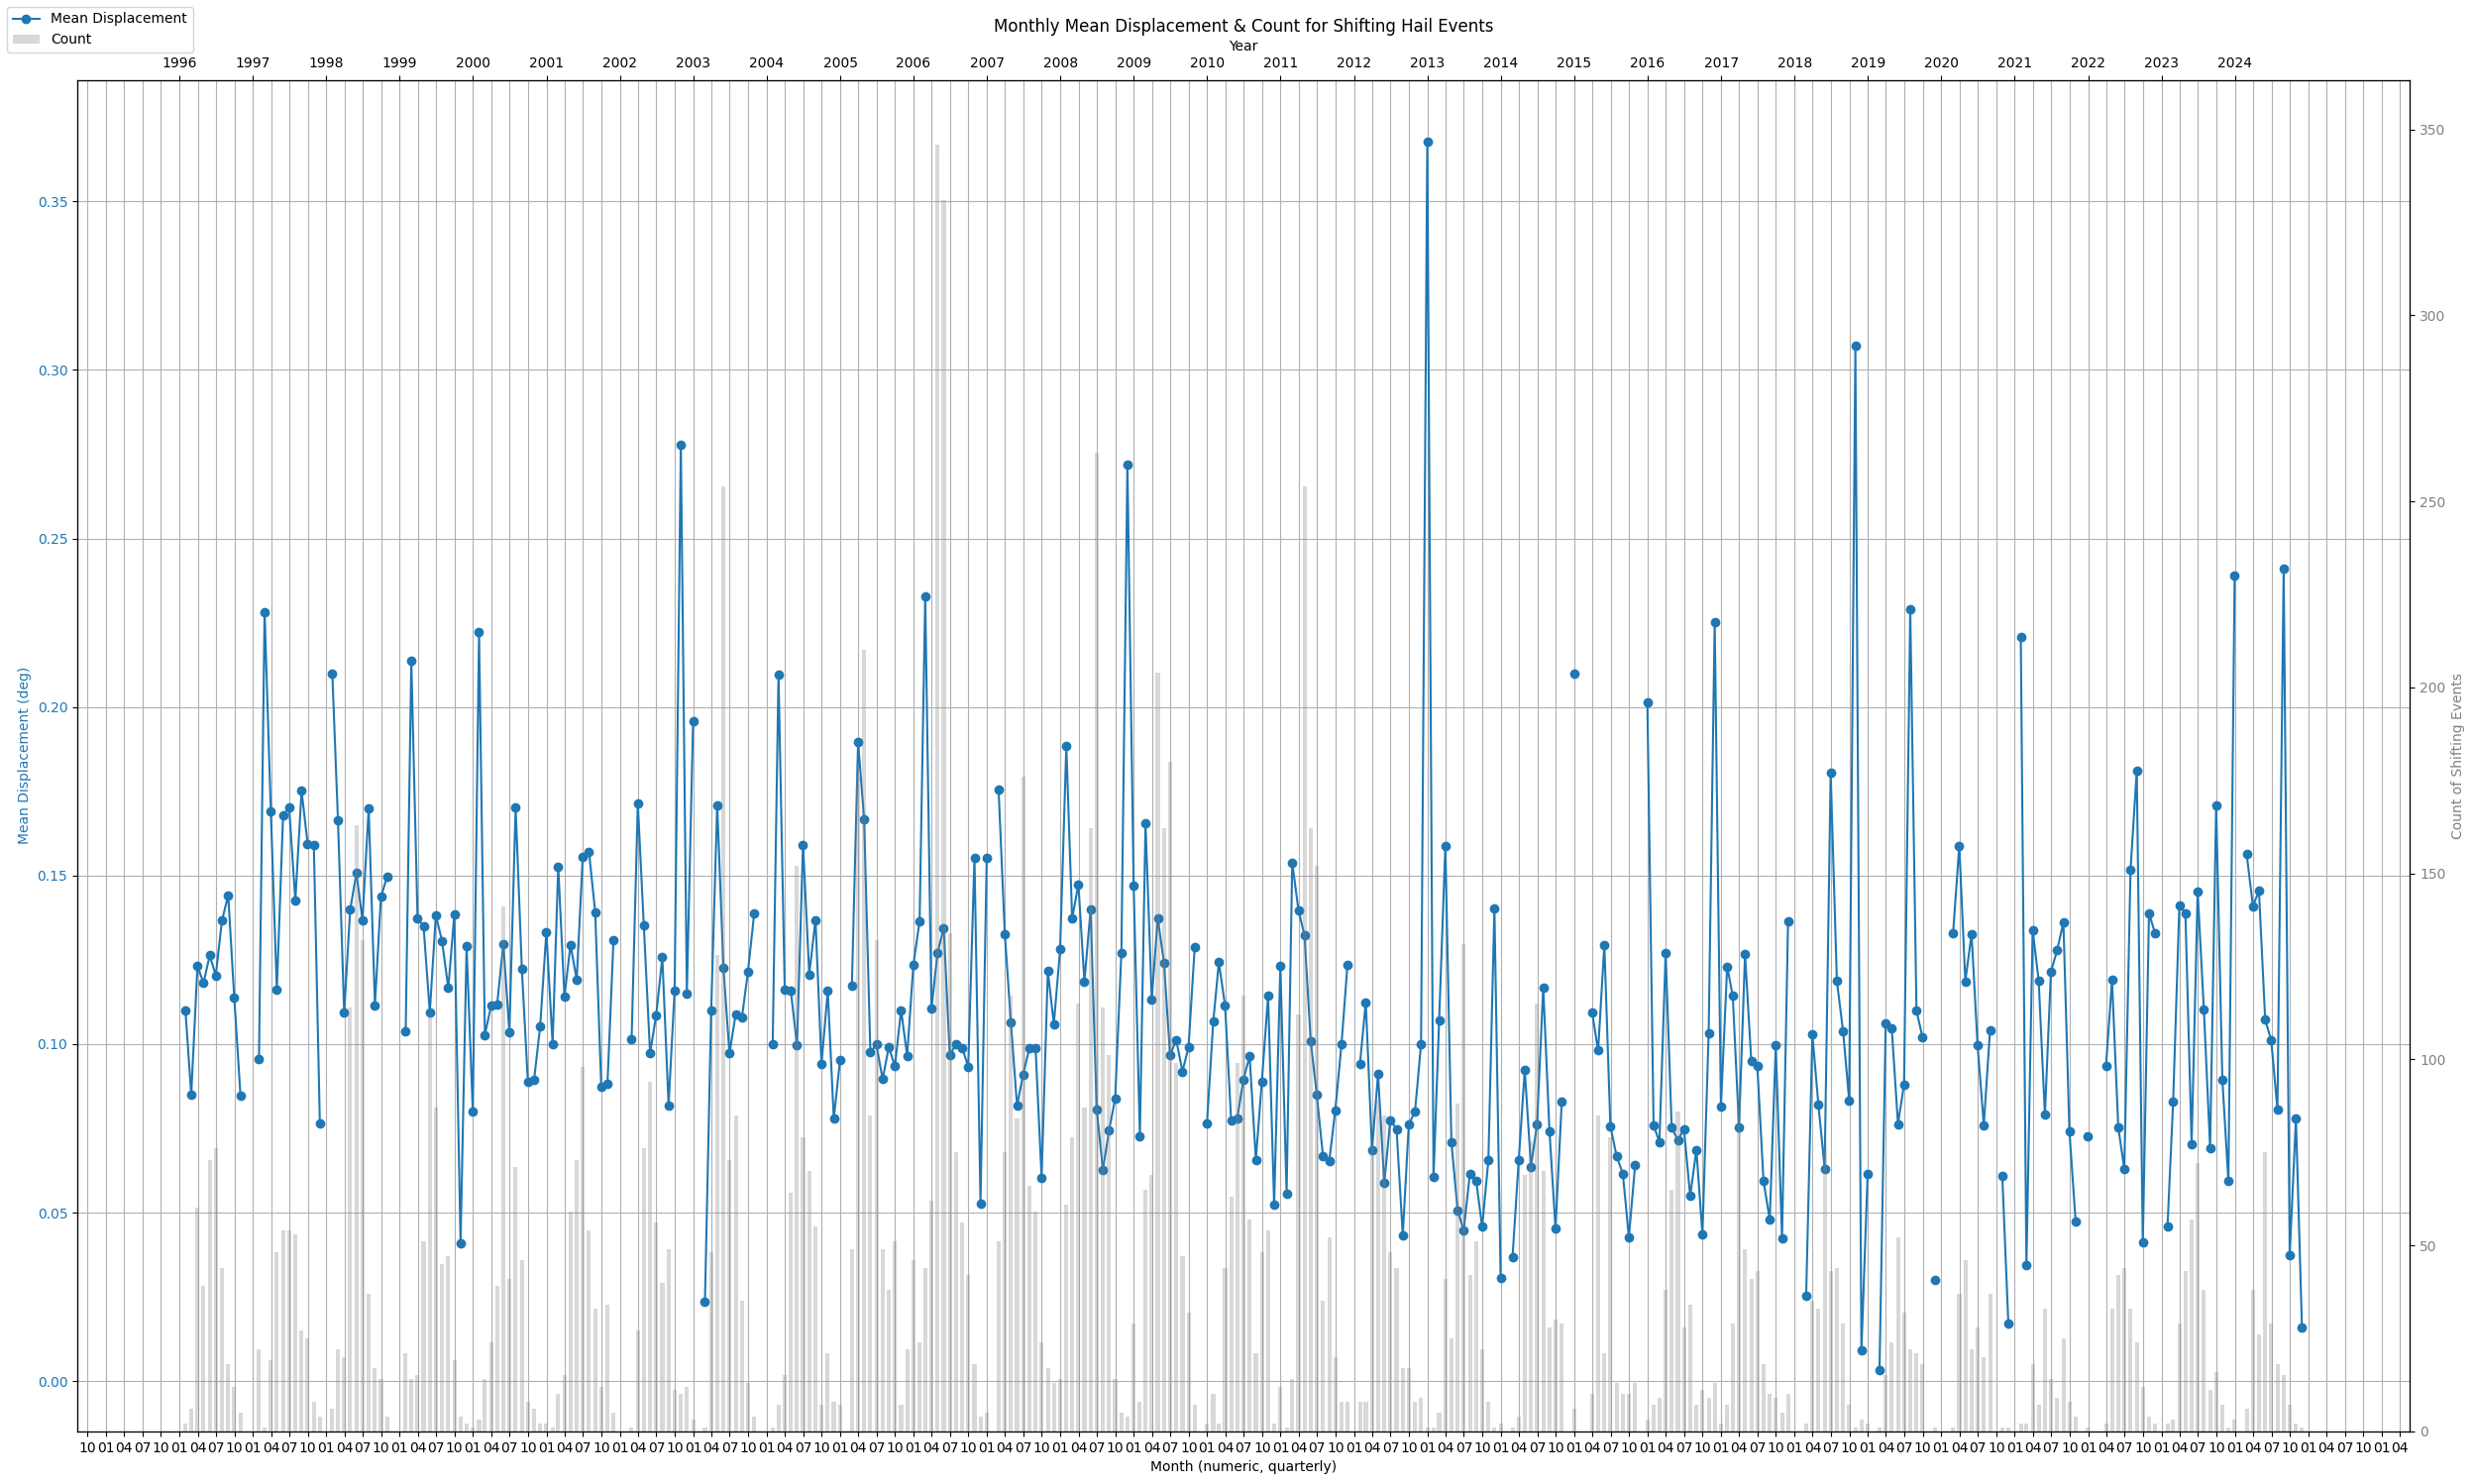

In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')

mask_shifting = (
    df[['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']].notna().all(axis=1)
    & (
        (df['BEGIN_LAT'] != df['END_LAT'])
        | (df['BEGIN_LON'] != df['END_LON'])
      )
)
shifting = df[mask_shifting].copy()

shifting['deg_displacement'] = np.sqrt(
    (shifting['END_LAT'] - shifting['BEGIN_LAT'])**2 +
    (shifting['END_LON'] - shifting['BEGIN_LON'])**2
)

shifting.set_index('BEGIN', inplace=True)
monthly_disp   = shifting['deg_displacement'].resample('ME').mean()
monthly_counts = shifting.resample('ME').size()

fig, ax1 = plt.subplots(figsize=(25,15))

ax1.plot(monthly_disp.index, monthly_disp.values, 'C0-o', label='Mean Displacement')
ax1.set_ylabel('Mean Displacement (deg)', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Bar for monthly counts
ax2 = ax1.twinx()
ax2.bar(monthly_counts.index, monthly_counts.values, width=20, alpha=0.3, color='gray', label='Count')
ax2.set_ylabel('Count of Shifting Events', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

ax1.xaxis.set_major_locator(MonthLocator(bymonth=[1,4,7,10]))  
ax1.xaxis.set_major_formatter(DateFormatter('%m'))             
plt.setp(ax1.get_xticklabels(), rotation=0, ha='center')

ax_top = ax1.twiny()
ax_top.set_xlim(ax1.get_xlim())
year_starts = monthly_disp.index.to_period('Y').to_timestamp()
unique_years = sorted({ts for ts in year_starts})
ax_top.set_xticks(unique_years)
ax_top.set_xticklabels([ts.year for ts in unique_years])
ax_top.xaxis.set_ticks_position('top')
ax_top.xaxis.set_label_position('top')
ax_top.set_xlabel('Year')

fig.legend(loc='upper left')
ax1.set_xlabel('Month (numeric, quarterly)')
plt.title('Monthly Mean Displacement & Count for Shifting Hail Events')
ax1.grid(True)
plt.tight_layout()
plt.show()


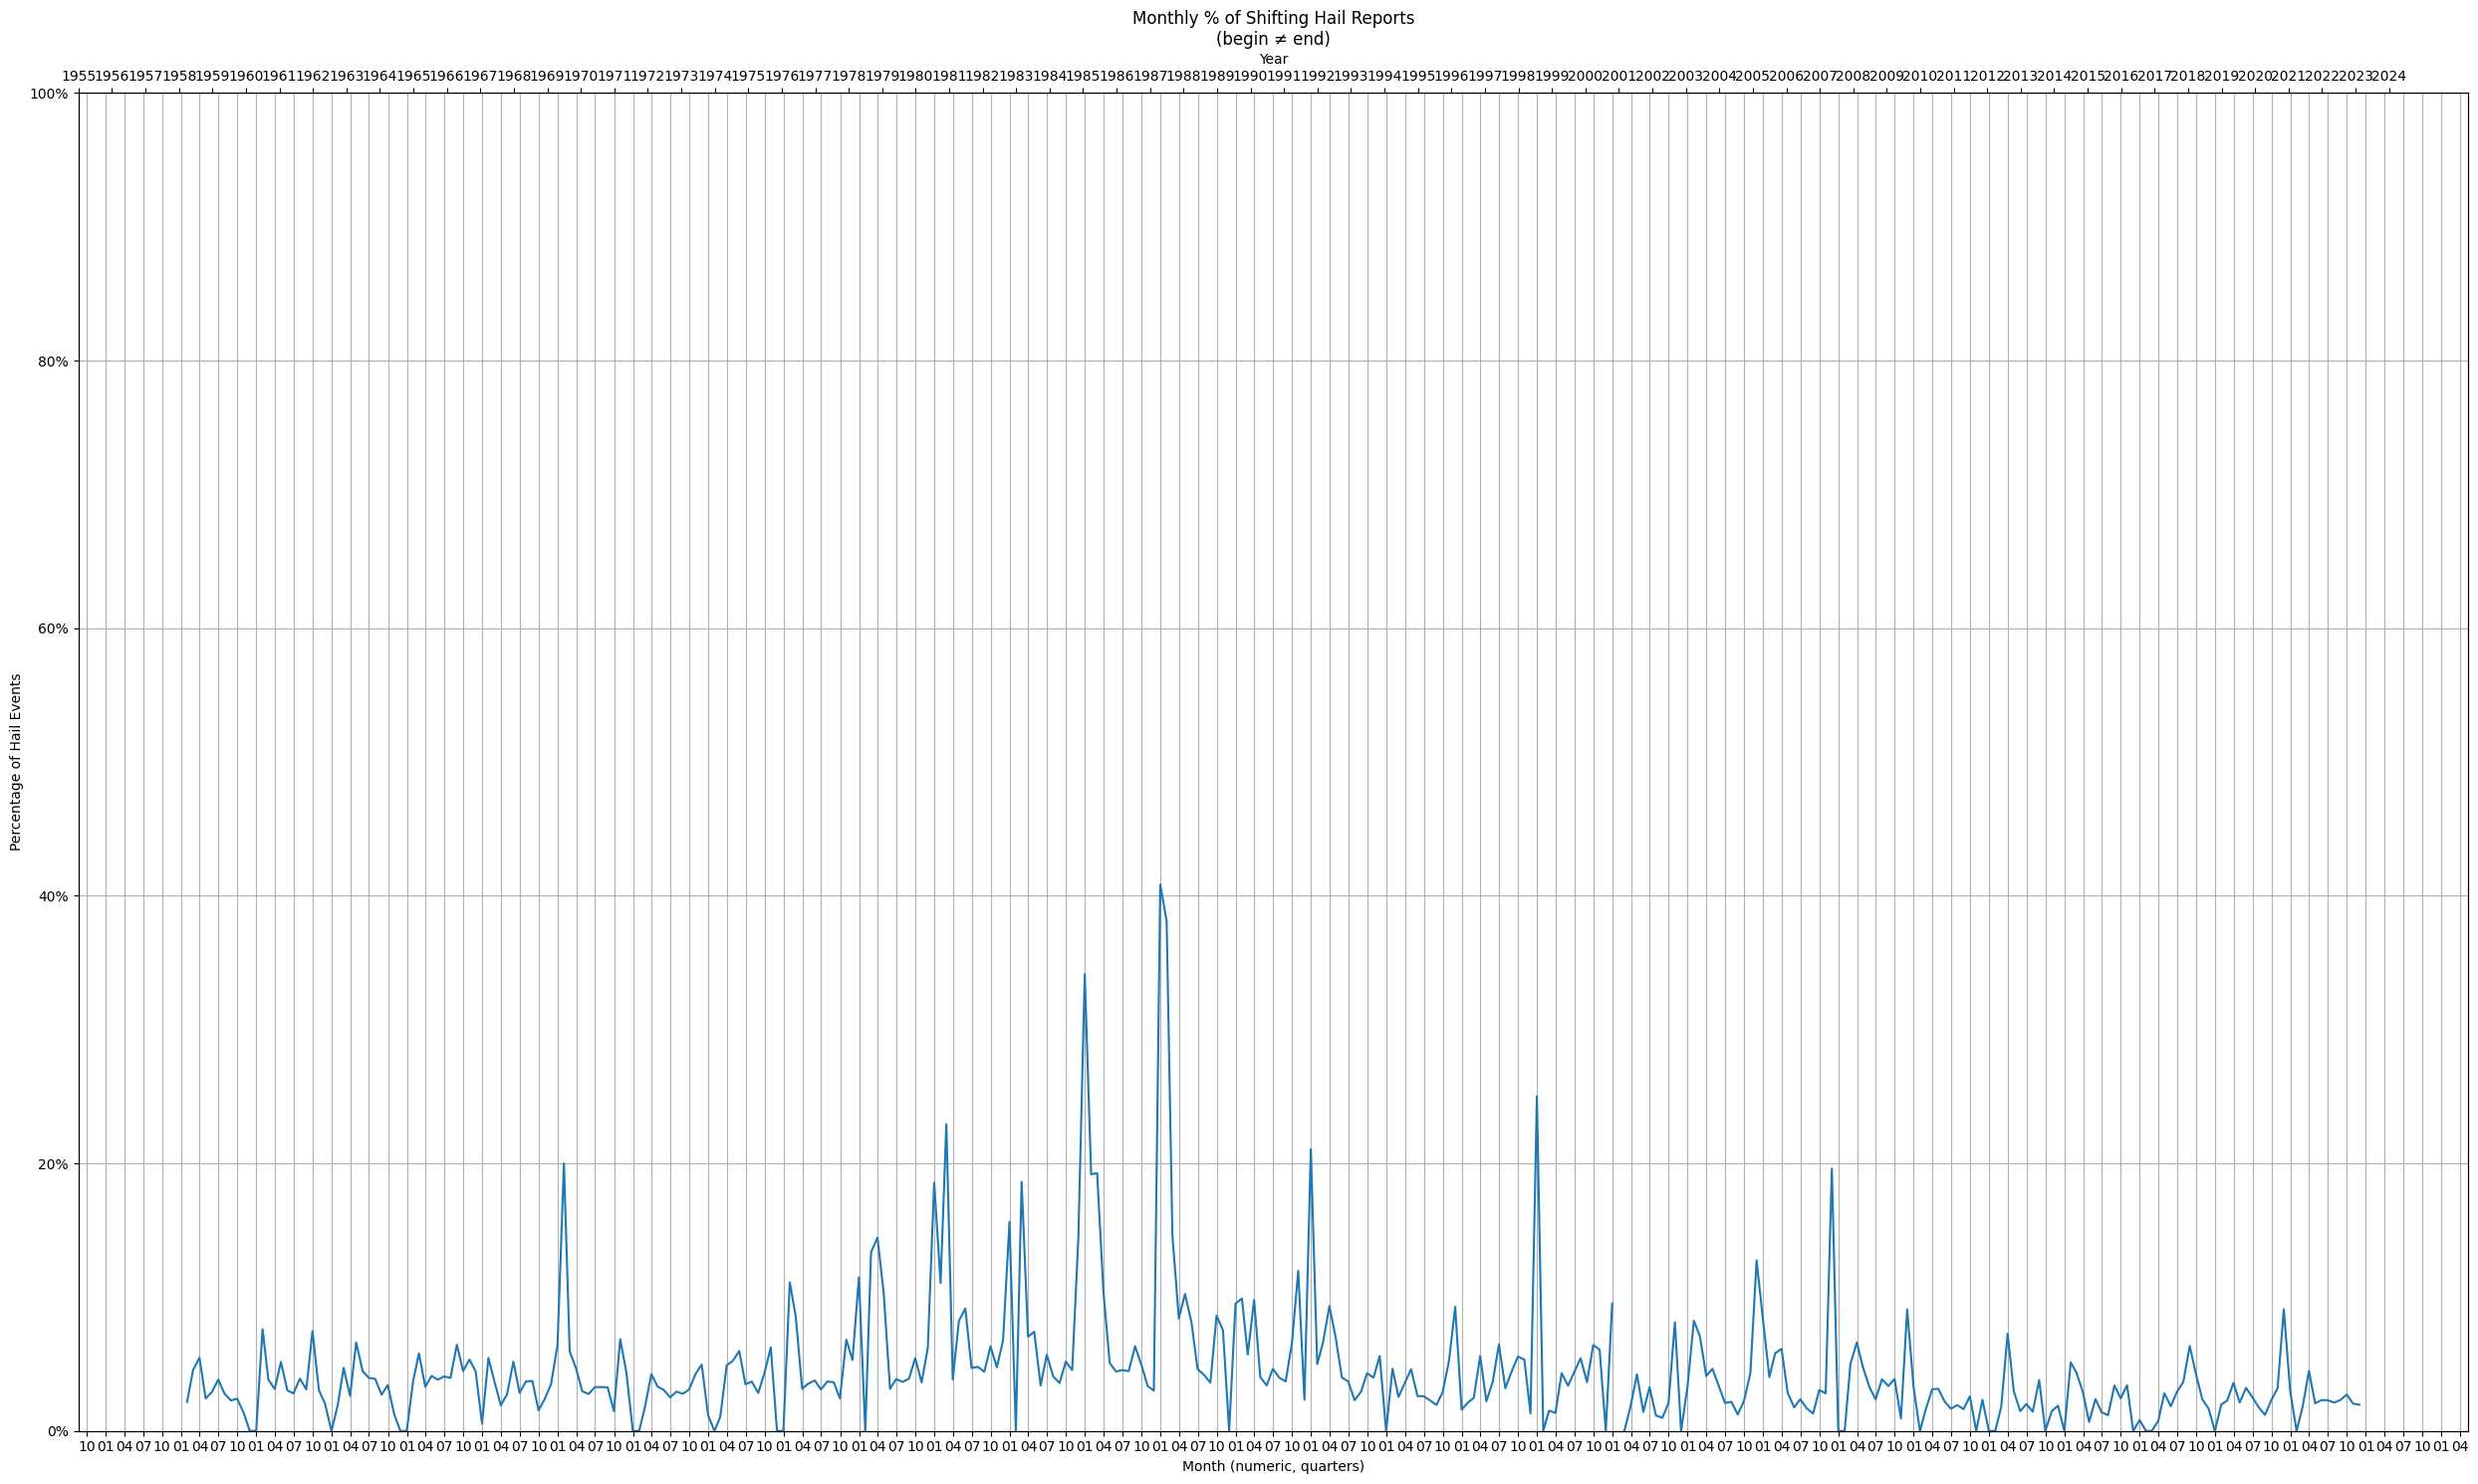

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import PercentFormatter

df = hail_reports.copy()
df['BEGIN'] = pd.to_datetime(df['BEGIN'].astype(str), format='%Y%m%d%H%M')
df.set_index('BEGIN', inplace=True)

total_monthly = df.resample('ME').size()

mask_shifting = (
    df[['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']].notna().all(axis=1)
    & (
        (df['BEGIN_LAT'] != df['END_LAT'])
        | (df['BEGIN_LON'] != df['END_LON'])
      )
)
shifting = df[mask_shifting]
shifting_monthly = shifting.resample('ME').size()

pct_monthly = (shifting_monthly / total_monthly) * 100
pct_monthly = pct_monthly.reindex(total_monthly.index, fill_value=0)

fig, ax = plt.subplots(figsize=(25,15))

ax.plot(pct_monthly.index, pct_monthly.values, label='Shifting = % of Total')
ax.yaxis.set_major_formatter(PercentFormatter())
ax.set_ylim(0, 100)

ax.xaxis.set_major_locator(MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(DateFormatter('%m'))
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
year_starts = pct_monthly.index.to_period('Y').to_timestamp()
unique_years = sorted({ts for ts in year_starts})
ax_top.set_xticks(unique_years)
ax_top.set_xticklabels([ts.year for ts in unique_years])
ax_top.xaxis.set_ticks_position('top')
ax_top.xaxis.set_label_position('top')
ax_top.set_xlabel('Year')

ax.set_xlabel('Month (numeric, quarters)')
ax.set_ylabel('Percentage of Hail Events')
ax.set_title('Monthly % of Shifting Hail Reports\n(begin ≠ end)')
ax.grid(True)

plt.tight_layout()
plt.show()


# Under here is just formating data so we can actually use later on

In [415]:
fill_hail_reports = hail_reports
fill_hail_reports

,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,NaN,NaN,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,NaN,NaN,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,NaN,NaN,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,NaN,NaN,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [419]:
fill_hail_reports['END_LAT'] = (
    fill_hail_reports['END_LAT']
      .fillna(fill_hail_reports['BEGIN_LAT'])
)
fill_hail_reports['END_LON'] = (
    fill_hail_reports['END_LON']
      .fillna(fill_hail_reports['BEGIN_LON'])
)
fill_hail_reports

/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_30625/77819830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_hail_reports['END_LAT'] = (
/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_30625/77819830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_hail_reports['END_LON'] = (


,BEGIN,END,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MAGNITUDE
1865,195509221610,195509221610,Hail,38.70,-94.08,38.70,-94.08,1.50
1868,195507191330,195507191330,Hail,30.50,-87.90,30.50,-87.90,0.75
1875,195510281645,195510281645,Hail,33.28,-86.78,33.28,-86.78,2.00
1879,195506121700,195506121700,Hail,37.08,-107.80,37.08,-107.80,1.00
1882,195505071845,195505071845,Hail,37.08,-94.68,37.08,-94.68,1.75
...,...,...,...,...,...,...,...,...
1168917,202407061246,202407061246,Hail,40.58,-99.38,40.58,-99.38,1.75
1168918,202407061520,202407061520,Hail,40.32,-98.90,40.32,-98.90,0.75
1168944,202407061255,202407061255,Hail,40.55,-99.32,40.55,-99.32,2.00
1168953,202407061258,202407061258,Hail,40.71,-99.88,40.71,-99.88,1.00


In [396]:
rows_with_nan = fill_hail_reports[fill_hail_reports.isnull().any(axis=1)].index
rows_with_nan

Index([ 187503,  187505,  187507,  187516,  187524,  187526,  187528,  187529,
        187532,  187533,
       ...
        555179,  555477,  555655,  555657,  557108,  558123, 1054697, 1054698,
       1054766, 1054767],
      dtype='int64', length=20236)

In [305]:
hail_outlooks= hail_outlooks.dropna()


In [306]:
nan_counts = hail_outlooks.isna().sum()
nan_counts

BEGIN         0
END           0
EVENT_TYPE    0
BEGIN_LAT     0
BEGIN_LON     0
END_LAT       0
END_LON       0
dtype: int64